<a href="https://colab.research.google.com/github/hoseinm444/FanapExercises/blob/main/FFCVS_Dec23_Python_Ex08_Hosein_Mohammadi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise08


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def show_img_plt(img, fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img,cmap ='gray' , vmin=vmin, vmax=vmax)
    #plt.axis('off')

In [ ]:
def show_mult_img_plt(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i],cmap = 'gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

In [ ]:
def show_mult_img_plt_little(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(8, 10), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i],cmap = 'gray', vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

##Ex01

1- Apply the kernel to the image with erosion method. Use Zero-Padding method for padding. (200 points)

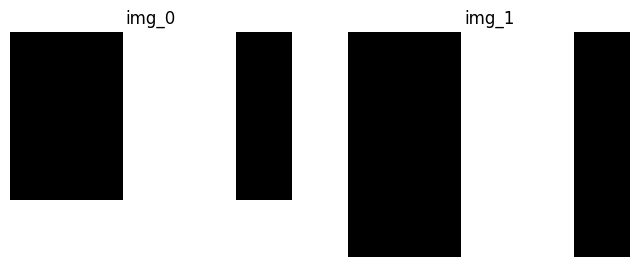

In [ ]:
binary_img_erosion = np.array([[0,0,255,255,0],
                      [0,0,255,255,0],
                      [0,0,255,255,0],
                      [255,255,255,255,255]] ,np.uint8)
kernel_for_erosion = np.ones((3,1), np.uint8)
erod_img = cv2.erode(binary_img_erosion, kernel_for_erosion, iterations=5)
show_mult_img_plt_little(1,2,(binary_img_erosion,erod_img))

##Exe02

2- Apply the kernel to the image with dilation method. Use Zero-Padding method for padding

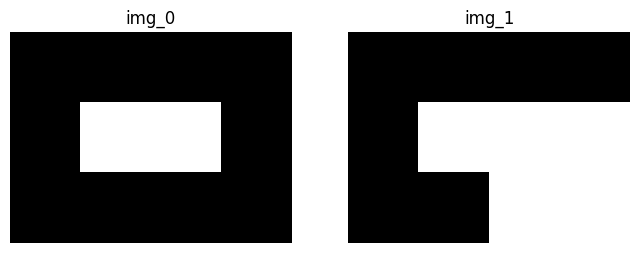

In [ ]:
binary_img_dilation = np.array([[0,0,0,0],
                                [0,255,255,0],
                                [0,0,0,0]] ,np.uint8)
kernel_for_dilation =np.ones((2,2),np.uint8)
kernel_for_dilation[0:1 , 1:2]= 0
dilate_img = cv2.dilate(binary_img_dilation, kernel_for_dilation, iterations=5)
show_mult_img_plt_little(1,2,(binary_img_dilation,dilate_img))

##Exe03

3-Convolve the following image with Gaussian kernel (3x3), use Zero-Padding

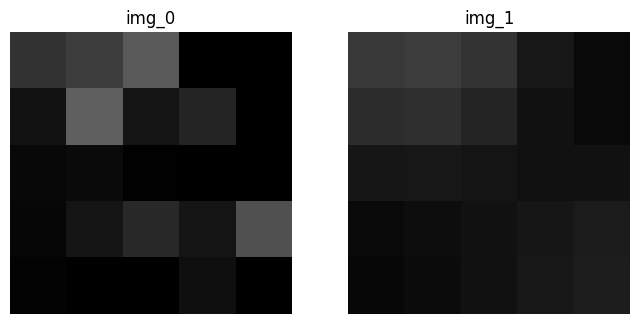

In [ ]:
guassian_image = np.array([[50,60,90,0,0],
                           [18,95,20,36,0],
                           [8,10,1,0,0],
                           [6,20,40,20,80],
                           [3,0,0,15,0]] ,np.uint8)
image_with_gaussian_kernel = cv2.GaussianBlur(guassian_image, (3,3), 0)
show_mult_img_plt_little(1,2,(guassian_image,image_with_gaussian_kernel))

##Exe04

4-Apply the Median kernel (3x3) on the following image, using Zero-Padding.

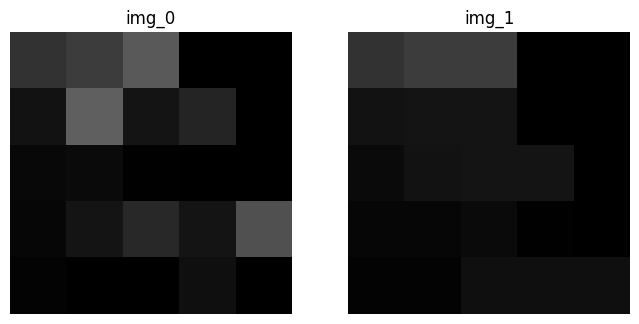

In [ ]:
median_image = np.array([[50,60,90,0,0],
                           [18,95,20,36,0],
                           [8,10,1,0,0],
                           [6,20,40,20,80],
                           [3,0,0,15,0]] ,np.uint8)
box_on_median_image = cv2.medianBlur(median_image, 3)
show_mult_img_plt_little(1,2,(median_image,box_on_median_image))

##Exe05

Use contrast enhancement ways and Denoising methods to enhance the following noisy image to
the output image. Use both input images for denoising, and compare 'jpg' and 'png' formats! (The
pictures are available in the questions folder)

all the work we have done in this question

1.convert from bgr to rgb

2.salt and pepper denoising on image from 1

3.guassian denoising on image from 2

4.clahe image enhansment on image from 3

on both jpg and png images

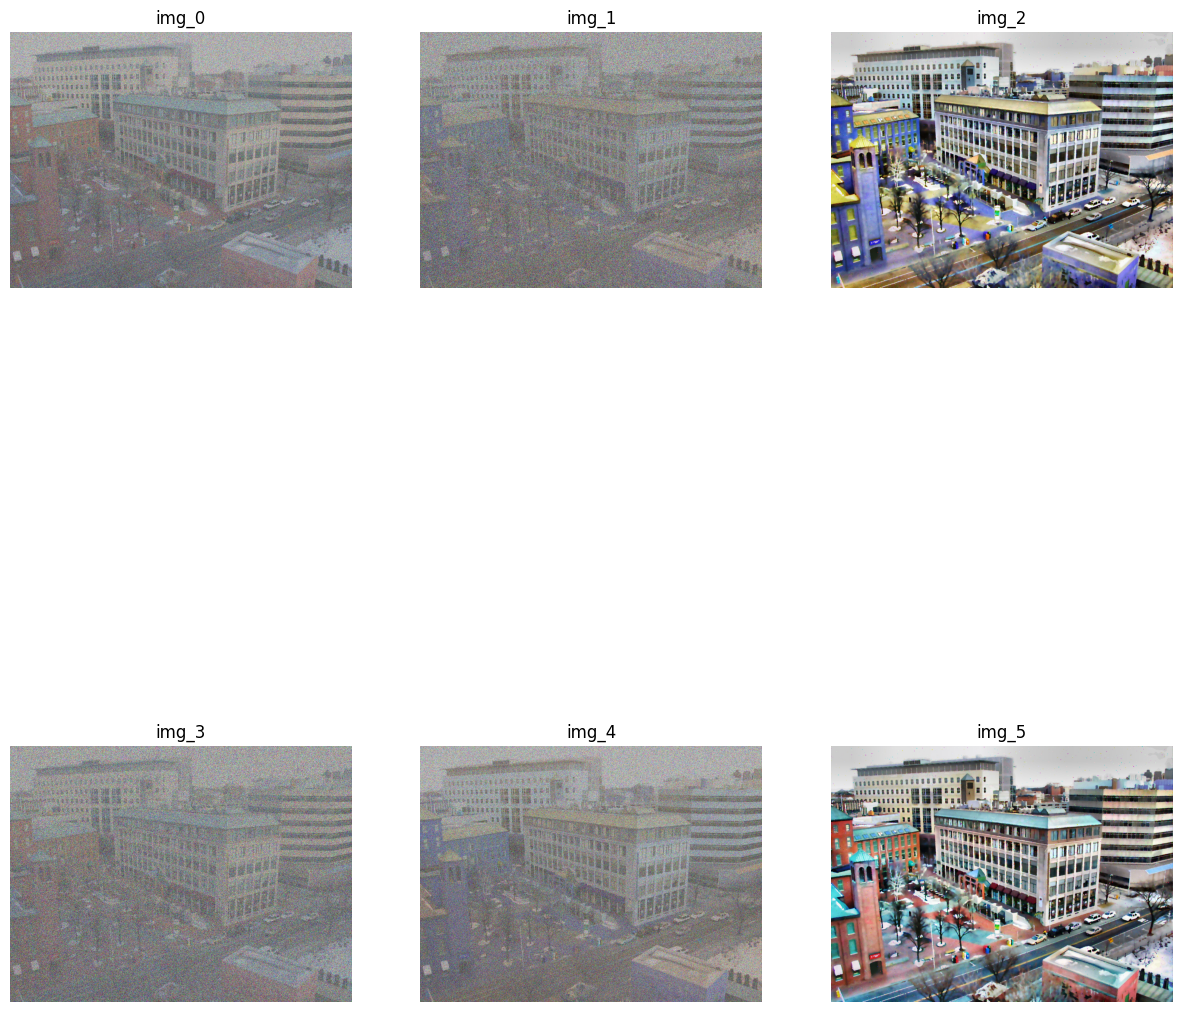

In [ ]:
jpg_image_bgr =cv2.imread(r"input.jpg",cv2.IMREAD_UNCHANGED)
png_image_bgr =cv2.imread(r"input.png",cv2.IMREAD_UNCHANGED)
out_image_bgr =cv2.imread("output.jpg",cv2.IMREAD_UNCHANGED)

jpg_image_rgb =cv2.cvtColor(jpg_image_bgr,cv2.COLOR_BGR2RGB)
png_image_rgb =cv2.cvtColor(png_image_bgr,cv2.COLOR_BGR2RGB)
out_image_rgb =cv2.cvtColor(out_image_bgr,cv2.COLOR_BGR2RGB)
show_mult_img_plt(2,3,(png_image_bgr,jpg_image_bgr,out_image_bgr,jpg_image_rgb,png_image_rgb,out_image_rgb))

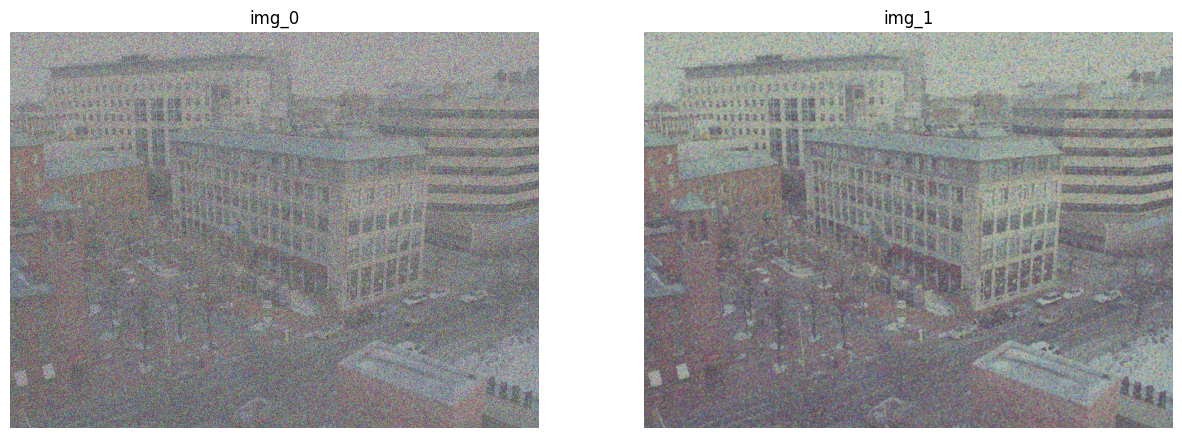

In [ ]:
#for eliminate salt & pepper we should use median filter
#for jpg
jpg_image_denoising_sp = jpg_image_rgb.copy()
median_on_sp_jpg = cv2.medianBlur(jpg_image_denoising_sp, 5)
show_mult_img_plt(1, 2, (jpg_image_denoising_sp, median_on_sp_jpg))


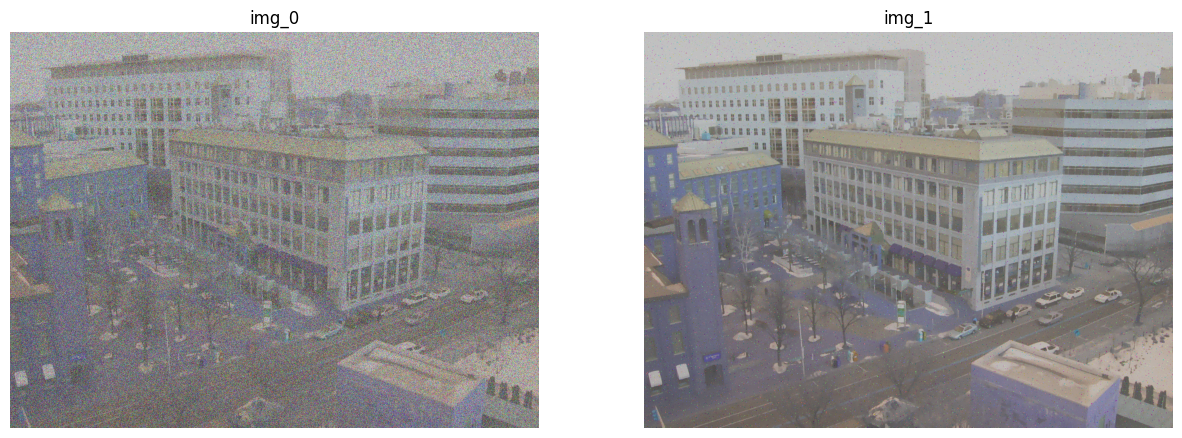

In [ ]:
#for png
png_image_denoising_sp = png_image_rgb.copy()
median_on_sp_png = cv2.medianBlur(png_image_denoising_sp, 3)
show_mult_img_plt(1, 2, (png_image_denoising_sp, median_on_sp_png))

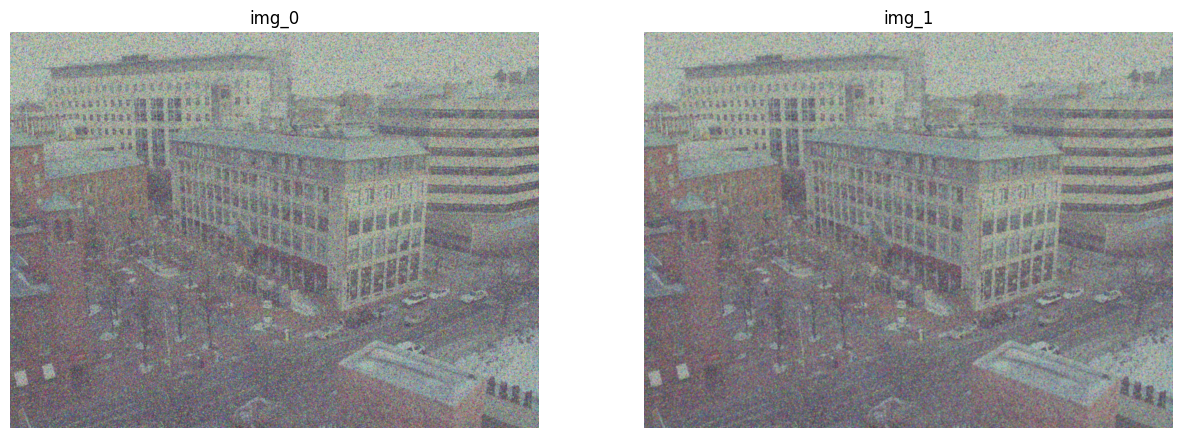

In [ ]:
#gaussian noise
#for jpg
jpg_img_guassian = median_on_sp_jpg.copy()
gaussian_on_jpg = cv2.GaussianBlur(jpg_img_guassian, (5, 5), 0)
show_mult_img_plt(1, 2, (jpg_img_guassian, gaussian_on_jpg))

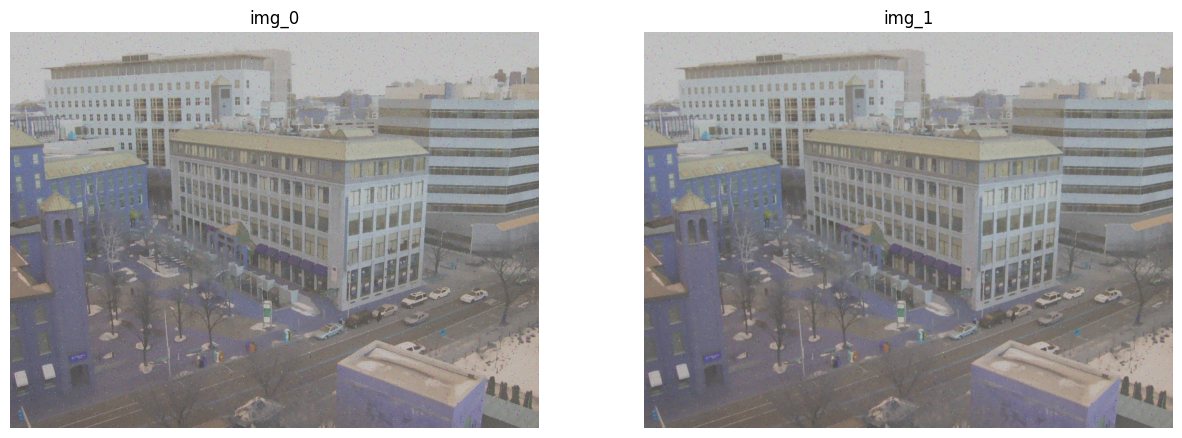

In [ ]:
#for png
png_img_guassian = median_on_sp_png.copy()
gaussian_on_png = cv2.GaussianBlur(png_img_guassian, (5, 5), 0)
show_mult_img_plt(1, 2, (png_img_guassian, gaussian_on_png))

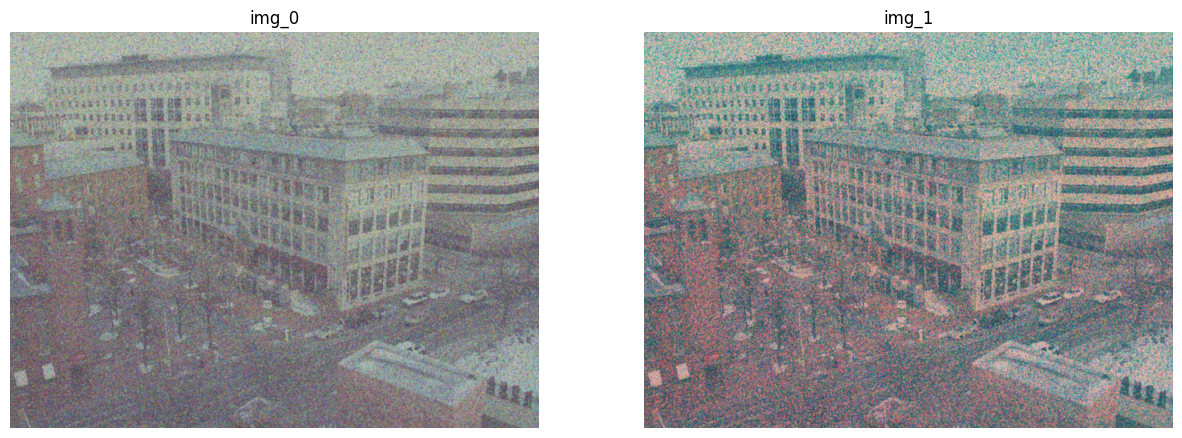

In [76]:
#contrast enhansment
#for jpg
jpg_img_ce = gaussian_on_jpg.copy()
jpg_img_ce_rgba = cv2.cvtColor(jpg_img_ce,cv2.COLOR_RGB2RGBA)
l_channel, a, b,c = cv2.split(jpg_img_ce_rgba)
clahe_100 =cv2.createCLAHE(clipLimit=2.0)
jpg_clahe_img = clahe_100.apply(l_channel)
limg = cv2.merge((jpg_clahe_img,a,b,c))
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_RGBA2RGB)
show_mult_img_plt(1, 2, (jpg_img_ce,enhanced_img))

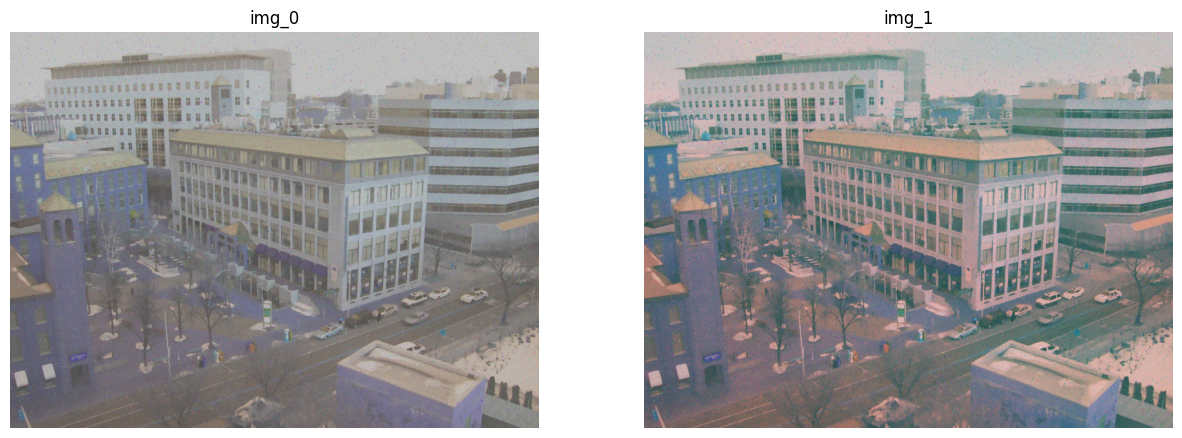

In [77]:
#contrast enhansment
#for png
png_img_ce = gaussian_on_png.copy()
png_img_ce_rgba = cv2.cvtColor(png_img_ce,cv2.COLOR_RGB2RGBA)
l_channel, a, b,c = cv2.split(png_img_ce_rgba)
clahe_100 =cv2.createCLAHE(clipLimit=2.0)
png_clahe_img = clahe_100.apply(l_channel)
limg = cv2.merge((png_clahe_img,a,b,c))
enhanced_img = cv2.cvtColor(limg, cv2.COLOR_RGBA2RGB)
show_mult_img_plt(1, 2, (png_img_ce,enhanced_img))